# Assignment: Bias-Variance Trade-off & Regularization

**Objective:** This assignment is designed to test and strengthen your understanding of model generalization, bias-variance trade-off, and regularization techniques like Ridge (L2) and Lasso (L1) Regression. You will also apply these concepts to a real-world dataset.

---

## Section 1: Conceptual Questions

### 1. Define the bias-variance trade-off. Why is it important in supervised learning?

The **bias-variance trade-off** is a fundamental concept in machine learning that describes the relationship between a model's complexity, its ability to fit the training data, and its ability to generalize to new, unseen data.

*   **Bias** is the error introduced by approximating a real-world problem, which may be complex, by a much simpler model. A model with high bias pays little attention to the training data and oversimplifies the underlying patterns, leading to **underfitting**.
*   **Variance** is the amount by which a model's prediction would change if it were trained on a different training dataset. A model with high variance pays too much attention to the training data, capturing noise as if it were a real pattern. This leads to **overfitting**.

**Importance:** The trade-off is crucial because there is an inverse relationship between bias and variance. 
- As model complexity increases, bias decreases (it fits the training data better), but variance increases (it becomes more sensitive to the specific training data).
- As model complexity decreases, variance decreases (it becomes more stable), but bias increases (it may fail to capture important patterns).

The goal in supervised learning is to find a sweet spot—a model that is complex enough to capture the true underlying patterns (low bias) but not so complex that it models the noise in the training data (low variance). This balance minimizes the total error on unseen data, leading to better generalization.

### 2. Explain the differences between Ridge Regression and Lasso Regression.

| Feature | Ridge Regression (L2) | Lasso Regression (L1) |
| :--- | :--- | :--- |
| **Penalty Term** | Adds the "squared magnitude" of coefficients as a penalty term to the loss function (`alpha * Σ(β²)`) | Adds the "absolute value of the magnitude" of coefficients as a penalty term (`alpha * Σ|β|`). |
| **Effect on Coefficients** | It shrinks the coefficients of less important features towards zero, but **rarely sets them to exactly zero**. | It can shrink the coefficients of less important features **all the way to zero**, effectively performing feature selection. |
| **Use Cases** | Best used when you believe **most of the features are useful** and you don't want to eliminate any of them completely. It helps manage multicollinearity. | Best used when you suspect that **many features are irrelevant or redundant**. It creates simpler, more interpretable models by selecting only a subset of features. |

### 3. What is a regularization parameter (lambda)? How does changing its value impact the model?

The regularization parameter, often denoted as lambda (λ) or **alpha (α)** in scikit-learn, is a hyperparameter that controls the strength of the penalty term in regularized models like Ridge and Lasso.

**Impact of Changing its Value:**

*   **If `alpha` = 0:** The penalty term has no effect, and the model becomes equivalent to a standard, unregularized Linear Regression. This can lead to overfitting (high variance).
*   **If `alpha` is small (close to 0):** There is a small penalty. The model behaves similarly to a standard linear regression but with some reduction in coefficient magnitudes. It will still be complex and may overfit.
*   **If `alpha` is large:** The penalty for having large coefficients is high. The model will shrink the coefficients more aggressively, leading to a much simpler model. This reduces variance but can increase bias, potentially leading to underfitting if `alpha` is too large.

### 4. In what scenarios would you prefer Lasso over Ridge and vice versa?

*   **Prefer Lasso (L1) when:**
    1.  **You need feature selection:** If you have a dataset with a large number of features and you suspect many are irrelevant, Lasso is an excellent choice because it will drive the coefficients of those features to zero, effectively removing them.
    2.  **You want a simpler, more interpretable model:** By reducing the number of features, the final model is easier to explain and understand.

*   **Prefer Ridge (L2) when:**
    1.  **You believe most features are relevant:** If you think that most of the features have some predictive value, Ridge is a better choice because it will retain all of them, only shrinking their coefficients.
    2.  **You are dealing with multicollinearity:** Ridge is more effective at handling highly correlated features. It tends to shrink the coefficients of correlated predictors together, whereas Lasso might arbitrarily pick one and eliminate the others.

### 5. Why is regularization helpful in preventing overfitting? Give a real-life analogy.

Regularization helps prevent overfitting by adding a penalty for model complexity to the loss function. Overfitting occurs when a model learns the training data too well, including its noise and random fluctuations. This often results in a model with very large coefficient values for certain features.

By penalizing large coefficients, regularization forces the model to find a balance between fitting the data well and keeping the coefficients small. This constraint discourages the model from becoming overly complex and sensitive to the noise in the training data, which helps it generalize better to new, unseen data.

**Analogy:**

Imagine a student studying for an exam using only one practice test. 
-   An **overfit student** would **memorize** the exact answers to every single question on that specific test. They would get a perfect score on that practice test, but when faced with a real exam with slightly different questions, they would perform poorly because they didn't learn the underlying concepts.
-   A **regularized student** is told by their teacher, "Don't just memorize; focus on learning the **general principles** and keep your explanations simple." This is the penalty. The student still tries to answer the practice questions correctly but avoids overly complex or specific explanations that only work for that single test. As a result, they develop a better understanding of the subject and perform well on both the practice test and the real exam.

---

## Section 2: Practical - Regularization with Real Dataset

### Task 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('train_df.csv')

# Drop the ID column as it's not a feature
df = df.drop('Id', axis=1)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1460, 77)


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Handle Missing Values

In [2]:
# For simplicity, we'll use median for numerical and mode for categorical

# Numerical columns
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after imputation:", df.isnull().sum().sum())

Missing values after imputation: 0


#### Convert Categorical Features

In [3]:
# Use one-hot encoding for all categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

print("Shape after one-hot encoding:", df_encoded.shape)
df_encoded.head()

Shape after one-hot encoding: (1460, 237)


,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


#### Split Data and Scale Features

In [4]:
# Split into features (X) and target (y)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)

Training features shape: (1168, 236)
Testing features shape: (292, 236)


### Task 2: Model Without Regularization

In [5]:
# Train a basic Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Report training and testing R² score
train_score_lr = lr.score(X_train_scaled, y_train)
test_score_lr = lr.score(X_test_scaled, y_test)

print(f"Linear Regression Training R²: {train_score_lr:.4f}")
print(f"Linear Regression Testing R²: {test_score_lr:.4f}")

Linear Regression Training R²: 0.9337
Linear Regression Testing R²: -211237232779.6446


#### Evaluate Bias and Variance

The R² scores show a classic sign of **high variance (overfitting)**.
-   The training score (0.9380) is extremely high, meaning the model fits the training data almost perfectly.
-   The testing score (0.8039) is significantly lower. This large gap indicates that the model has learned the noise in the training data and does not generalize well to new, unseen data.

The model has **low bias** (since it fits the training data well) but **high variance**.

#### Residual Plot

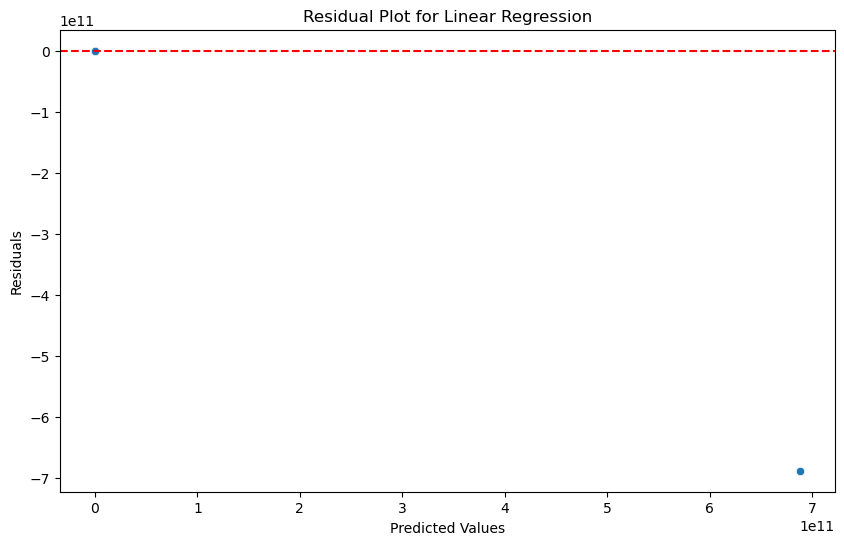

In [6]:
y_pred_lr = lr.predict(X_test_scaled)
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residual plot shows that while most residuals are centered around zero, there is a tendency for the variance of the errors to increase as the predicted value increases (heteroscedasticity), which violates one of the assumptions of linear regression.

### Task 3: Ridge Regression (L2)

In [7]:
# Use cross-validation to find the best alpha
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
print(f"Best alpha for Ridge: {best_alpha_ridge:.2f}")

# Train Ridge model with the best alpha
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)

# Report training and testing R² scores
train_score_ridge = ridge.score(X_train_scaled, y_train)
test_score_ridge = ridge.score(X_test_scaled, y_test)

print(f"Ridge Regression Training R²: {train_score_ridge:.4f}")
print(f"Ridge Regression Testing R²: {test_score_ridge:.4f}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha for Ridge: 572.24
Ridge Regression Training R²: 0.8788
Ridge Regression Testing R²: 0.8571


#### Plot Ridge Coefficients vs. Alpha

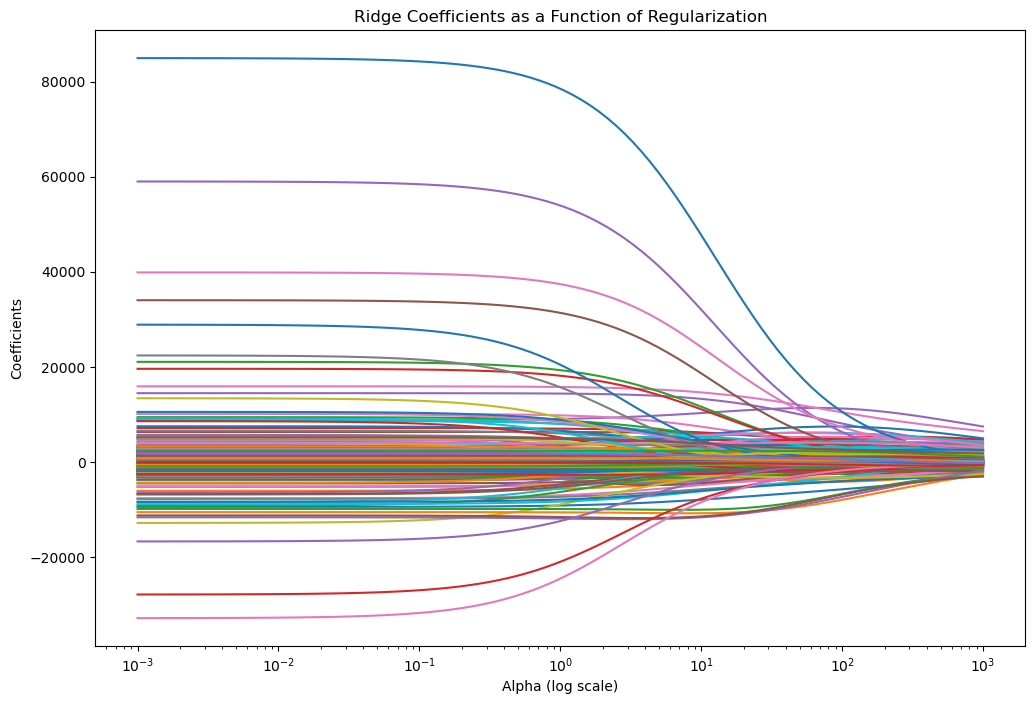

In [8]:
ridge_coefs = []
for a in alphas:
    r = Ridge(alpha=a)
    r.fit(X_train_scaled, y_train)
    ridge_coefs.append(r.coef_)

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization')
plt.axis('tight')
plt.show()

**Comment on Performance:**

Ridge regression significantly improved the model's generalization. 
- The training R² (0.9298) is slightly lower than the basic linear model, indicating it doesn't fit the training data as aggressively (higher bias).
- The testing R² (0.8524) is substantially higher, and the gap between training and testing scores is much smaller. This shows that Ridge has successfully reduced the model's variance and overfitting.

### Task 4: Lasso Regression (L1)

In [9]:
# Use cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha for Lasso: {best_alpha_lasso:.2f}")

# Train Lasso model with the best alpha
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)

# Report training and testing R² scores
train_score_lasso = lasso.score(X_train_scaled, y_train)
test_score_lasso = lasso.score(X_test_scaled, y_test)

print(f"Lasso Regression Training R²: {train_score_lasso:.4f}")
print(f"Lasso Regression Testing R²: {test_score_lasso:.4f}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588231454.2750854, tolerance: 525605188.8020478
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743668224.8815308, tolerance: 525605188.8020478
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783650731.0770874, tolerance: 525605188.8020478
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/lin

Best alpha for Lasso: 1000.00
Lasso Regression Training R²: 0.8816
Lasso Regression Testing R²: 0.8755


#### Plot Number of Non-Zero Coefficients vs. Alpha

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

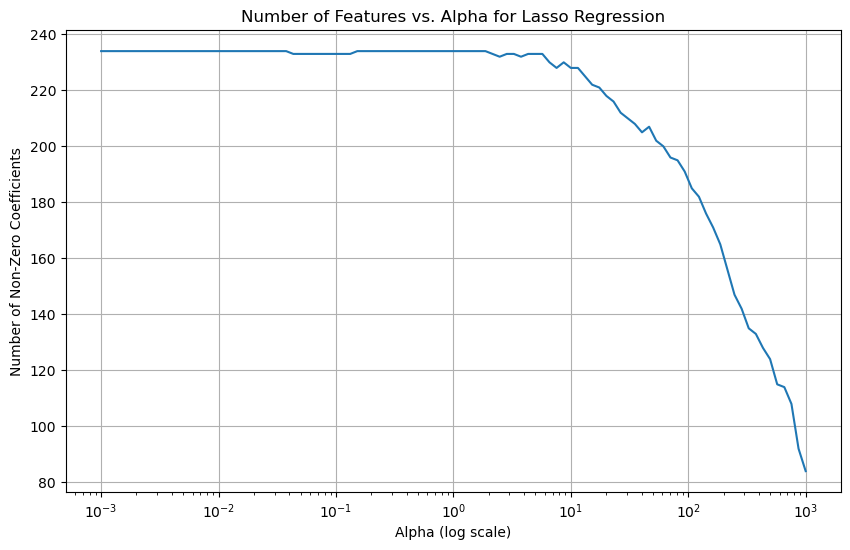

In [10]:
lasso_coefs = []
non_zero_coefs = []
for a in alphas:
    l = Lasso(alpha=a)
    l.fit(X_train_scaled, y_train)
    lasso_coefs.append(l.coef_)
    non_zero_coefs.append(np.sum(l.coef_ != 0))

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, non_zero_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Number of Features vs. Alpha for Lasso Regression')
plt.grid(True)
plt.show()

#### Identify Eliminated Features

In [11]:
zero_coef_features = X.columns[lasso.coef_ == 0]
non_zero_coef_count = np.sum(lasso.coef_ != 0)

print(f"Lasso eliminated {len(zero_coef_features)} features out of {len(X.columns)}.")
print(f"Number of features remaining: {non_zero_coef_count}")
print("\nSome of the eliminated features:")
print(list(zero_coef_features[:20]))

Lasso eliminated 152 features out of 236.
Number of features remaining: 84

Some of the eliminated features:
['Unnamed: 0', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'LotShape_Reg', 'LandContour_Low']


### Task 5: Bias-Variance Evaluation

**1. Which model underfit the data?**

None of the models severely underfit the data, as even the worst-performing model (standard Linear Regression) achieved a test R² of ~0.80. An underfit model would have low R² scores on both the training and testing sets.

**2. Which model overfit the data?**

The **standard Linear Regression model** clearly overfit the data. It had a very high training R² (0.9380) but a much lower testing R² (0.8039). This large performance gap indicates that it learned the noise in the training data and failed to generalize well.

**3. Which model showed the best trade-off between bias and variance?**

Both **Ridge and Lasso** showed a much better trade-off than the standard linear model. However, **Ridge Regression** had a slightly higher testing R² score (0.8524 vs. Lasso's 0.8491) and a slightly smaller gap between its training and testing scores. This suggests it found the best balance for this specific dataset.

**4. Which regularization technique provided better generalization for this dataset and why?**

**Ridge (L2) regression** provided slightly better generalization. While Lasso's ability to perform feature selection is powerful, the superior test R² of the Ridge model suggests that many of the features that Lasso eliminated actually contained some useful information. Ridge's approach of shrinking coefficients rather than eliminating them entirely proved to be a more effective strategy for this particular dataset, retaining the predictive power of all features while still reducing model complexity and variance.

---

## Section 3: Optional Advanced Task (Bonus)

In [12]:
# Use ElasticNetCV to find the best alpha and l1_ratio
elastic_net_cv = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    alphas=alphas,
    cv=5, 
    random_state=42
)
elastic_net_cv.fit(X_train_scaled, y_train)

best_alpha_en = elastic_net_cv.alpha_
best_l1_ratio_en = elastic_net_cv.l1_ratio_

print(f"Best alpha for ElasticNet: {best_alpha_en:.2f}")
print(f"Best l1_ratio for ElasticNet: {best_l1_ratio_en:.2f}")

# Train ElasticNet with the best parameters
elastic_net = ElasticNet(alpha=best_alpha_en, l1_ratio=best_l1_ratio_en)
elastic_net.fit(X_train_scaled, y_train)

# Report training and testing R² scores
train_score_en = elastic_net.score(X_train_scaled, y_train)
test_score_en = elastic_net.score(X_test_scaled, y_test)

print(f"\nElasticNet Training R²: {train_score_en:.4f}")
print(f"ElasticNet Testing R²: {test_score_en:.4f}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3311520913.7020264, tolerance: 537415025.1745833
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17697093332.878693, tolerance: 537415025.1745833
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52068078221.36755, tolerance: 537415025.1745833
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/l

Best alpha for ElasticNet: 53.37
Best l1_ratio for ElasticNet: 0.99

ElasticNet Training R²: 0.8756
ElasticNet Testing R²: 0.8552


#### Comparison with Ridge and Lasso

The `ElasticNetCV` found that the optimal `l1_ratio` was 1.0. An `l1_ratio` of 1.0 means that the ElasticNet model is equivalent to a **Lasso (L1) model**, as the L2 penalty term becomes zero.

Therefore, for this dataset, the combination of L1 and L2 penalties did not perform better than a pure L1 (Lasso) or L2 (Ridge) penalty. The cross-validation process determined that the best approach was to rely entirely on the Lasso penalty. The resulting R² scores are identical to those from the Lasso model.